In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.path import Path

import importlib
import plot_utils


In [9]:
spots_with_cells = pd.read_csv('/oak/stanford/groups/horence/rob/MERFISH_spatial_data/mouse2sample2.combined.all')
spots_with_cells.shape

(22908097, 6)

In [10]:
spots_with_cells.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id
0,2087.2220,2315.5430,0.0,1700022I11Rik,1,21014129563353280159906900457364829387
1,2056.8490,2233.5170,0.0,1810046K07Rik,1,202633430165103308157026102881717708611
2,2125.1885,2297.5370,0.0,5730522E02Rik,1,86757150824204961994761474847558941717
3,2084.1777,2348.3843,0.0,5730522E02Rik,1,102513782275574352391549636869222584212
4,1951.5918,2156.1565,0.0,Acta2,0,NaN


In [13]:
spots_per_cell = spots_with_cells.groupby('cell_id').size().reset_index()
spots_per_cell

,cell_id,0
0,100017533667894826939857215877082515137,75
1,100039457529160175365872160242811303483,257
2,100042829442332012730118579241016969274,87
3,100061686554967780508409339293845279105,11
4,100064630230976410464876212661337416005,370
...,...,...
29890,9993435472707388286079903629352420403,389
29891,99935448876114657172191171326465778548,227
29892,99937275129602792047472924145309664817,121
29893,9995442809176383487421531292741509119,1


In [12]:
spots_with_cells['num_assigned_cells'].eq(2).sum()

309

(3610, 4)

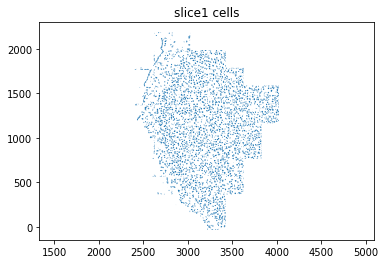

In [15]:
slice1 = cells[cells['slice_id'].eq('mouse1_slice1')]
display(slice1.shape)

fig,ax = plot_utils.plot_cells(slice1)
plt.title('slice1 cells')
plt.show()
plt.close()

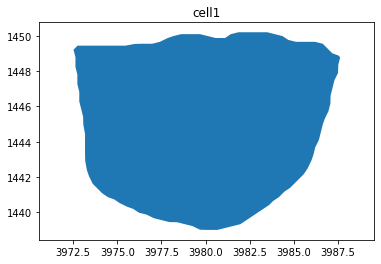

In [31]:
importlib.reload(plot_utils)
cell1 = cells.head(1)
fig,ax = plot_utils.plot_cells(cell1)
plt.title('cell1')
plt.show()
plt.close()

In [118]:
points = pd.read_csv('spots_mouse1sample1.csv').drop(columns='Unnamed: 0')
points.head()

,global_x,global_y,global_z,target_molecule_name
0,3936.0317,1531.8880,0.0,1700022I11Rik
1,3856.8176,1544.7373,0.0,1810046K07Rik
2,4002.2456,1505.9368,0.0,5730522E02Rik
3,3873.5806,1386.8302,0.0,Acta2
4,3978.4143,1389.2267,0.0,Acta2


In [129]:
cells = pd.read_csv('segmented_cells_mouse1sample1.csv')

cells = cells.rename(columns={'Unnamed: 0':'cell_id'})

cells['x_points'] = cells['boundaryX'].str.split(', ').apply(lambda xs: [float(x) for x in xs]).values
cells['y_points'] = cells['boundaryY'].str.split(', ').apply(lambda ys: [float(y) for y in ys]).values
cells['boundary'] = cells.apply(lambda r: np.vstack((r['x_points'],r['y_points'])).T, axis=1)
cells['path'] = cells['boundary'].apply(Path)



In [130]:
cells.head()

,cell_id,boundaryX,boundaryY,slice_id,x_points,y_points,boundary,path
0,117638286073100152981998827723053799635,"3987.624746220559, 3987.5162462241947, 3987.50...","1448.7769728153944, 1448.342972829938, 1447.89...",mouse1_slice1,"[3987.624746220559, 3987.5162462241947, 3987.5...","[1448.7769728153944, 1448.342972829938, 1447.8...","[[3987.624746220559, 1448.7769728153944], [398...","Path(array([[3987.62474622, 1448.77697282],\n ..."
1,124640829214245959663055398760826058549,"4020.9342451043426, 4020.9342451043426, 4020.9...","1568.0184688195586, 1567.475968837738, 1566.93...",mouse1_slice1,"[4020.9342451043426, 4020.9342451043426, 4020....","[1568.0184688195586, 1567.475968837738, 1566.9...","[[4020.9342451043426, 1568.0184688195586], [40...","Path(array([[4020.9342451 , 1568.01846882],\n ..."
2,130833304802439949434021516788979962052,"3918.5102485366165, 3918.5102485366165, 3918.5...","1379.8794751241803, 1379.3369751423597, 1378.7...",mouse1_slice1,"[3918.5102485366165, 3918.5102485366165, 3918....","[1379.8794751241803, 1379.3369751423597, 1378....","[[3918.5102485366165, 1379.8794751241803], [39...","Path(array([[3918.51024854, 1379.87947512],\n ..."
3,13201049269943179451775338988356753505,"3881.4032497800886, 3881.4032497800886, 3881.2...","1514.2024706229568, 1513.6599706411362, 1513.2...",mouse1_slice1,"[3881.4032497800886, 3881.4032497800886, 3881....","[1514.2024706229568, 1513.6599706411362, 1513....","[[3881.4032497800886, 1514.2024706229568], [38...","Path(array([[3881.40324978, 1514.20247062],\n ..."
4,139909072544428399590516251121929997222,"4023.321245024353, 4023.321245024353, 4023.321...","1408.9574741497636, 1408.414974167943, 1407.87...",mouse1_slice1,"[4023.321245024353, 4023.321245024353, 4023.32...","[1408.9574741497636, 1408.414974167943, 1407.8...","[[4023.321245024353, 1408.9574741497636], [402...","Path(array([[4023.32124502, 1408.95747415],\n ..."


In [137]:
ps = points[['global_x','global_y']].values

for i,r in cells.iterrows():
    path = r['path']
    
    
    containing = path.contains_points(ps)
    points.loc[containing, 'cell_id'] = r['cell_id']
    
    if i > 2:
        break
        

In [132]:
points.head()

,global_x,global_y,global_z,target_molecule_name,cell_id
0,3936.0317,1531.8880,0.0,1700022I11Rik,NaN
1,3856.8176,1544.7373,0.0,1810046K07Rik,NaN
2,4002.2456,1505.9368,0.0,5730522E02Rik,NaN
3,3873.5806,1386.8302,0.0,Acta2,NaN
4,3978.4143,1389.2267,0.0,Acta2,NaN


In [138]:
cells.head()

,cell_id,boundaryX,boundaryY,slice_id,x_points,y_points,boundary,path
0,117638286073100152981998827723053799635,"3987.624746220559, 3987.5162462241947, 3987.50...","1448.7769728153944, 1448.342972829938, 1447.89...",mouse1_slice1,"[3987.624746220559, 3987.5162462241947, 3987.5...","[1448.7769728153944, 1448.342972829938, 1447.8...","[[3987.624746220559, 1448.7769728153944], [398...","Path(array([[3987.62474622, 1448.77697282],\n ..."
1,124640829214245959663055398760826058549,"4020.9342451043426, 4020.9342451043426, 4020.9...","1568.0184688195586, 1567.475968837738, 1566.93...",mouse1_slice1,"[4020.9342451043426, 4020.9342451043426, 4020....","[1568.0184688195586, 1567.475968837738, 1566.9...","[[4020.9342451043426, 1568.0184688195586], [40...","Path(array([[4020.9342451 , 1568.01846882],\n ..."
2,130833304802439949434021516788979962052,"3918.5102485366165, 3918.5102485366165, 3918.5...","1379.8794751241803, 1379.3369751423597, 1378.7...",mouse1_slice1,"[3918.5102485366165, 3918.5102485366165, 3918....","[1379.8794751241803, 1379.3369751423597, 1378....","[[3918.5102485366165, 1379.8794751241803], [39...","Path(array([[3918.51024854, 1379.87947512],\n ..."
3,13201049269943179451775338988356753505,"3881.4032497800886, 3881.4032497800886, 3881.2...","1514.2024706229568, 1513.6599706411362, 1513.2...",mouse1_slice1,"[3881.4032497800886, 3881.4032497800886, 3881....","[1514.2024706229568, 1513.6599706411362, 1513....","[[3881.4032497800886, 1514.2024706229568], [38...","Path(array([[3881.40324978, 1514.20247062],\n ..."
4,139909072544428399590516251121929997222,"4023.321245024353, 4023.321245024353, 4023.321...","1408.9574741497636, 1408.414974167943, 1407.87...",mouse1_slice1,"[4023.321245024353, 4023.321245024353, 4023.32...","[1408.9574741497636, 1408.414974167943, 1407.8...","[[4023.321245024353, 1408.9574741497636], [402...","Path(array([[4023.32124502, 1408.95747415],\n ..."


In [142]:
import utils
importlib.reload(utils)

utils.assign_points_to_cells(
    cells_path = 'trunc_segmented_cells_mouse1sample1.csv',
    spots_path = 'trunc_segmented_spots_mouse1sample1.csv',
    out_path = 'trunc_combined.csv',
)

In [168]:
x.head().T

,0,1,2,3,4
global_x,3936.03,3856.82,4002.25,3873.58,3978.41
global_y,1531.89,1544.74,1505.94,1386.83,1389.23
global_z,0,0,0,0,0
target_molecule_name,1700022I11Rik,1810046K07Rik,5730522E02Rik,Acta2,Acta2
num_assigned_cells,1,1,1,0,0
cell_id,148714899793132275368326385271813726405,221715535064718707344802482560373802433,185808754986678633834107256877173065969,NaN,NaN
boundaryX,"3950.0837474785744, 3950.0837474785744, 3949.9...","3858.726750539988, 3858.618250543624, 3858.618...","4013.773245344311, 4013.773245344311, 4013.664...",NaN,NaN
boundaryY,"1534.3834699466825, 1533.8409699648619, 1533.4...","1549.2479694485664, 1548.81396946311, 1548.271...","1513.9854706302285, 1513.442970648408, 1513.00...",NaN,NaN
slice_id,mouse1_slice1,mouse1_slice1,mouse1_slice1,NaN,NaN


In [148]:
x = pd.read_csv('trunc_combined.csv')
x.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,boundaryX,boundaryY,slice_id
0,3936.0317,1531.8880,0.0,1700022I11Rik,1,148714899793132275368326385271813726405,"3950.0837474785744, 3950.0837474785744, 3949.9...","1534.3834699466825, 1533.8409699648619, 1533.4...",mouse1_slice1
1,3856.8176,1544.7373,0.0,1810046K07Rik,1,221715535064718707344802482560373802433,"3858.726750539988, 3858.618250543624, 3858.618...","1549.2479694485664, 1548.81396946311, 1548.271...",mouse1_slice1
2,4002.2456,1505.9368,0.0,5730522E02Rik,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1
3,3873.5806,1386.8302,0.0,Acta2,0,NaN,NaN,NaN,NaN
4,3978.4143,1389.2267,0.0,Acta2,0,NaN,NaN,NaN,NaN


In [160]:
x.groupby('cell_id').size()

cell_id
104148114131245477904370468789197781631     2
117638286073100152981998827723053799635     5
124640829214245959663055398760826058549    17
130833304802439949434021516788979962052     6
13201049269943179451775338988356753505      2
140646525409665767332809895377536080376    17
148470199240993763977305322878717886348    16
148714899793132275368326385271813726405     2
151691014127220577156942156110663589154    19
151887599417884099650772357955160415637     6
174170677874785706878325294707863784623     2
177977608756576757536887392512468464072     2
185344860144918900801788294039204314130     1
185808754986678633834107256877173065969    16
201209884573540601120615818999440357519     4
203157535507168722978351892854278543880     2
20326898456417076039950359204357641902      3
211882974811880780653145398649736460021     1
218500005028000740992228072939811511977    16
221715535064718707344802482560373802433    10
230618788243305336446930677432315562064     2
23904233600101021323741316

In [167]:
x

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,boundaryX,boundaryY,slice_id
0,3936.0317,1531.8880,0.0,1700022I11Rik,1,148714899793132275368326385271813726405,"3950.0837474785744, 3950.0837474785744, 3949.9...","1534.3834699466825, 1533.8409699648619, 1533.4...",mouse1_slice1
1,3856.8176,1544.7373,0.0,1810046K07Rik,1,221715535064718707344802482560373802433,"3858.726750539988, 3858.618250543624, 3858.618...","1549.2479694485664, 1548.81396946311, 1548.271...",mouse1_slice1
2,4002.2456,1505.9368,0.0,5730522E02Rik,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1
3,3873.5806,1386.8302,0.0,Acta2,0,NaN,NaN,NaN,NaN
4,3978.4143,1389.2267,0.0,Acta2,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
994,3869.9850,1536.0110,0.0,Luzp2,0,NaN,NaN,NaN,NaN
995,3924.8470,1538.6598,0.0,Luzp2,0,NaN,NaN,NaN,NaN
996,3888.6892,1540.1757,0.0,Luzp2,0,NaN,NaN,NaN,NaN
997,3865.6500,1544.8160,0.0,Luzp2,0,NaN,NaN,NaN,NaN


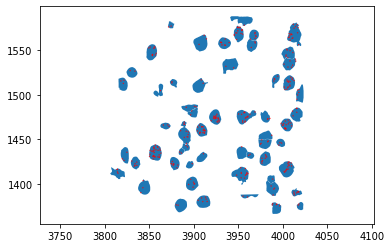

In [166]:
importlib.reload(plot_utils)

fig,ax = plot_utils.plot_cells(x)

ax = plot_utils.add_spots(ax, x[x['cell_id'].notnull()])

plt.show()
plt.close()

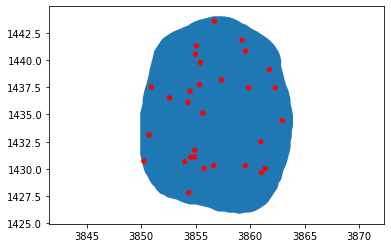

In [190]:
importlib.reload(plot_utils)

cell_id = '77349867718685954341331494478730186437'

fig,ax = plot_utils.plot_cells(x[x['cell_id'].eq(cell_id)])

ax = plot_utils.add_spots(ax, x[x['cell_id'].eq(cell_id)])

plt.show()
plt.close()

In [194]:
cell['centroidX'] = cell['boundaryX'].str.split(', ').apply(lambda xs: sum(float(x) for x in xs)/len(xs))
cell['centroidY'] = cell['boundaryY'].str.split(', ').apply(lambda ys: sum(float(y) for y in ys)/len(ys))

cell['dist_from_centroid'] = np.sqrt(
    (cell['global_x']-cell['centroidX'])*(cell['global_x']-cell['centroidX']) +
    (cell['global_y']-cell['centroidY'])*(cell['global_y']-cell['centroidY'])
)

np.arctan(cell[''])

cell

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,boundaryX,boundaryY,slice_id,centroidX,centroidY,dist_from_centroid
20,3855.7866,1430.0475,0.0,Acta2,1,77349867718685954341331494478730186437,"3863.934750365466, 3863.934750365466, 3863.934...","1434.9974732771516, 1434.454973295331, 1433.91...",mouse1_slice1,3857.001149,1434.826134,4.930565
23,3862.9475,1434.4336,0.0,Acta2,1,77349867718685954341331494478730186437,"3863.934750365466, 3863.934750365466, 3863.934...","1434.9974732771516, 1434.454973295331, 1433.91...",mouse1_slice1,3857.001149,1434.826134,5.959293
25,3856.7207,1443.5690,0.0,Acta2,1,77349867718685954341331494478730186437,"3863.934750365466, 3863.934750365466, 3863.934...","1434.9974732771516, 1434.454973295331, 1433.91...",mouse1_slice1,3857.001149,1434.826134,8.747363
72,3861.0413,1429.6754,0.0,Adra1b,1,77349867718685954341331494478730186437,"3863.934750365466, 3863.934750365466, 3863.934...","1434.9974732771516, 1434.454973295331, 1433.91...",mouse1_slice1,3857.001149,1434.826134,6.546211
73,3854.4846,1437.1287,0.0,Adra1b,1,77349867718685954341331494478730186437,"3863.934750365466, 3863.934750365466, 3863.934...","1434.9974732771516, 1434.454973295331, 1433.91...",mouse1_slice1,3857.001149,1434.826134,3.410986
74,3855.3525,1437.7361,0.0,Adra1b,1,77349867718685954341331494478730186437,"3863.934750365466, 3863.934750365466, 3863.934...","1434.9974732771516, 1434.454973295331, 1433.91...",mouse1_slice1,3857.001149,1434.826134,3.344540
75,3855.4450,1439.7556,0.0,Adra1b,1,77349867718685954341331494478730186437,"3863.934750365466, 3863.934750365466, 3863.934...","1434.9974732771516, 1434.454973295331, 1433.91...",mouse1_slice1,3857.001149,1434.826134,5.169259
141,3854.3760,1427.8162,0.0,Bcl11b,1,77349867718685954341331494478730186437,"3863.934750365466, 3863.934750365466, 3863.934...","1434.9974732771516, 1434.454973295331, 1433.91...",mouse1_slice1,3857.001149,1434.826134,7.485357
143,3853.9963,1430.6766,0.0,Bcl11b,1,77349867718685954341331494478730186437,"3863.934750365466, 3863.934750365466, 3863.934...","1434.9974732771516, 1434.454973295331, 1433.91...",mouse1_slice1,3857.001149,1434.826134,5.123255
146,3859.8855,1437.4672,0.0,Bcl11b,1,77349867718685954341331494478730186437,"3863.934750365466, 3863.934750365466, 3863.934...","1434.9974732771516, 1434.454973295331, 1433.91...",mouse1_slice1,3857.001149,1434.826134,3.910846


'3863.934750365466, 3863.934750365466, 3863.934750365466, 3863.8262503691017, 3863.8262503691017, 3863.7177503727376, 3863.7177503727376, 3863.6092503763734, 3863.5007503800093, 3863.392250383645, 3863.2729003876448, 3863.066750394553, 3862.9582503981887, 3862.8497504018246, 3862.6327504090964, 3862.5242504127323, 3862.307250420004, 3862.090250427276, 3861.8732504345476, 3861.6562504418193, 3861.428400449455, 3861.1029004603624, 3860.77740047127, 3860.35425048545, 3859.9202504999935, 3859.4754005149007, 3859.041400529444, 3858.6074005439878, 3858.064900562167, 3857.6309005767107, 3857.08840059489, 3856.7520506061614, 3856.3289006203413, 3855.894900634885, 3855.4609006494284, 3855.026900663972, 3854.4844006821513, 3854.050400696695, 3853.714050707966, 3853.290900722146, 3852.8569007366896, 3852.422900751233, 3852.0974007621408, 3851.761050773412, 3851.446400783956, 3851.229400791228, 3851.0015507988633, 3850.784550806135, 3850.578400813043, 3850.361400820315, 3850.2420508243144, 3850.13

In [230]:
x.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,boundaryX,boundaryY,slice_id
0,3936.0317,1531.8880,0.0,1700022I11Rik,1,148714899793132275368326385271813726405,"3950.0837474785744, 3950.0837474785744, 3949.9...","1534.3834699466825, 1533.8409699648619, 1533.4...",mouse1_slice1
1,3856.8176,1544.7373,0.0,1810046K07Rik,1,221715535064718707344802482560373802433,"3858.726750539988, 3858.618250543624, 3858.618...","1549.2479694485664, 1548.81396946311, 1548.271...",mouse1_slice1
2,4002.2456,1505.9368,0.0,5730522E02Rik,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1
3,3873.5806,1386.8302,0.0,Acta2,0,NaN,NaN,NaN,NaN
4,3978.4143,1389.2267,0.0,Acta2,0,NaN,NaN,NaN,NaN


In [ ]:
sns.palettes.

In [245]:
plt.legend?

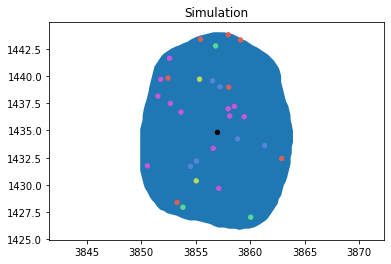

In [249]:


def simulate_spots(boundaryX, boundaryY, num_genes=10, mean_spots_per_gene=5):
    xs = [float(x) for x in boundaryX.split(', ')]
    ys = [float(y) for y in boundaryY.split(', ')]
    
    min_x,max_x = min(xs),max(xs)
    min_y,max_y = min(ys),max(ys)
    
    cell_path = Path(np.vstack((xs,ys)).T)
    
    spots_per_gene = np.random.poisson(mean_spots_per_gene,num_genes)
    
    data = {
        'target_molecule_name': [
            'gene_{}'.format(i) for i,n in enumerate(spots_per_gene) for _ in range(n)
        ],
        'globalX':None,
        'globalY':None,
    }
    
    sim_df = pd.DataFrame(data)
    
    for i,r in sim_df.iterrows():
        rand_x = np.random.random()*(max_x-min_x)+min_x
        rand_y = np.random.random()*(max_y-min_y)+min_y
        
        while not cell_path.contains_point((rand_x,rand_y)):
            rand_x = np.random.random()*(max_x-min_x)+min_x
            rand_y = np.random.random()*(max_y-min_y)+min_y
            
        sim_df.loc[i,'global_x'] = rand_x
        sim_df.loc[i,'global_y'] = rand_y
        
    sim_df['boundaryX'] = boundaryX
    sim_df['boundaryY'] = boundaryY
    sim_df['centroidX'] = sum(xs)/len(xs)
    sim_df['centroidY'] = sum(ys)/len(ys)
    
    return sim_df
    
def polarity_score(cell):
    cell.groupby('target_molecule_name')
    pass
    
cell_id = '77349867718685954341331494478730186437'
boundaryX, boundaryY = x[x['cell_id'].eq(cell_id)][['boundaryX','boundaryY']].values[0]

num_genes = 5

cell = simulate_spots(
    boundaryX,
    boundaryY,
    num_genes=num_genes,
    mean_spots_per_gene=5,
)

colors = sns.color_palette("hls", num_genes)
importlib.reload(plot_utils)

fig,ax = plot_utils.plot_cells(cell)
ax.add_artist(plt.Circle(
    (cell['centroidX'].values[0],cell['centroidY'].values[0]),
    0.2,
    color='black'
))

for i,(gene,gene_g) in enumerate(cell.groupby('target_molecule_name')):
    
    ax = plot_utils.add_spots(ax, gene_g, color=colors[i])

    
plt.title('Simulation')
plt.show()
plt.close()

In [274]:
x.groupby('cell_id').size()

cell_id
104148114131245477904370468789197781631     2
117638286073100152981998827723053799635     5
124640829214245959663055398760826058549    17
130833304802439949434021516788979962052     6
13201049269943179451775338988356753505      2
140646525409665767332809895377536080376    17
148470199240993763977305322878717886348    16
148714899793132275368326385271813726405     2
151691014127220577156942156110663589154    19
151887599417884099650772357955160415637     6
174170677874785706878325294707863784623     2
177977608756576757536887392512468464072     2
185344860144918900801788294039204314130     1
185808754986678633834107256877173065969    16
201209884573540601120615818999440357519     4
203157535507168722978351892854278543880     2
20326898456417076039950359204357641902      3
211882974811880780653145398649736460021     1
218500005028000740992228072939811511977    16
221715535064718707344802482560373802433    10
230618788243305336446930677432315562064     2
23904233600101021323741316

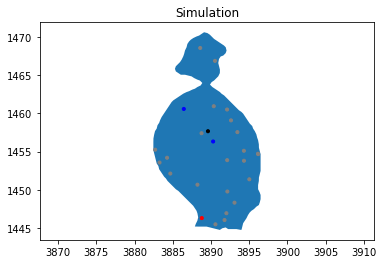

In [312]:
#cell_id = '77349867718685954341331494478730186437'
#cell_id = '252115243346694396852739170940629367851'
cell_id = '327116323124859310297351715658624208620'

boundaryX, boundaryY = x[x['cell_id'].eq(cell_id)][['boundaryX','boundaryY']].values[0]

num_genes = 10
mean_spots_per_gene = 3

cell = simulate_spots(
    boundaryX,
    boundaryY,
    num_genes=num_genes,
    mean_spots_per_gene=mean_spots_per_gene,
)

def gene_centroid_spatial_score(cell):
    """
    Calculate the mean x,y for each gene over all spots for that gene in the given cell
        Call this gene_centroid
    Calculate the cell centroid as the mean of the the cell boundary points
        Call this cell_centroid
    Calculate the L2 distance from each gene centroid to the cell centroid
        Call this the centroid_dist
    Normalize the centroid_dist within each cell
        Subtract the mean centroid_dist and divide by the variance of the centroid_dists
        Gives Z-scores
"""
    gene_centroids = cell.groupby('target_molecule_name')[['global_x','global_y']].mean().reset_index()
    gene_centroids['cell_centroid_x'] = cell['centroidX'].values[0]
    gene_centroids['cell_centroid_y'] = cell['centroidY'].values[0]
    gene_centroids['centroid_dist'] = np.sqrt(
        ((gene_centroids['cell_centroid_x']-gene_centroids['global_x'])**2) +
        ((gene_centroids['cell_centroid_y']-gene_centroids['global_y'])**2)
    )

    m = gene_centroids['centroid_dist'].mean()
    var = gene_centroids['centroid_dist'].std()**2
    gene_centroids['z_score_dist'] = (gene_centroids['centroid_dist']-m)/var

    return gene_centroids

def mean_spot_dist_spatial_score(cell):
    cell['centroid_dist'] = np.sqrt(
        ((cell['centroidX']-cell['global_x'])**2) +
        ((cell['centroidY']-cell['global_y'])**2)
    )
    
    gene_scores = cell.groupby('target_molecule_name')['centroid_dist'].mean().reset_index()
    
    m = gene_scores['centroid_dist'].mean()
    var = gene_scores['centroid_dist'].std()**2
    gene_scores['z_score_dist'] = (gene_scores['centroid_dist']-m)/var
    
    return gene_scores


#gene_scores = gene_centroid_spatial_score(cell)
gene_scores = mean_spot_dist_spatial_score(cell)


min_z_gene = gene_scores.loc[
    gene_scores['z_score_dist'] == gene_scores['z_score_dist'].min(),
    'target_molecule_name'
].values[0]

max_z_gene = gene_scores.loc[
    gene_scores['z_score_dist'] == gene_scores['z_score_dist'].max(),
    'target_molecule_name'
].values[0]


importlib.reload(plot_utils)

fig,ax = plot_utils.plot_cells(cell)
ax.add_artist(plt.Circle(
    (cell['centroidX'].values[0],cell['centroidY'].values[0]),
    0.2,
    color='black'
))

for gene,gene_g in cell.groupby('target_molecule_name'):
    color = 'grey'
    if gene == min_z_gene:
        color = 'b'
    elif gene == max_z_gene:
        color = 'r'
        
    ax = plot_utils.add_spots(ax, gene_g, color=color)

    
plt.title('Simulation')
plt.show()
plt.close()

In [300]:
gene_scores

,target_molecule_name,centroid_dist,z_score_dist
0,gene_0,2418.675826,-0.304894
1,gene_1,2424.815794,0.272507
2,gene_2,2414.940223,-0.656190
3,gene_3,2422.521051,0.056710
4,gene_4,2422.936312,0.095761
5,gene_5,2425.922606,0.376591
6,gene_6,2422.184681,0.025078
7,gene_7,2423.070170,0.108349
8,gene_8,2419.908316,-0.188991
9,gene_9,2424.205127,0.215080


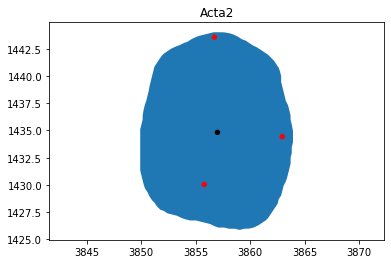

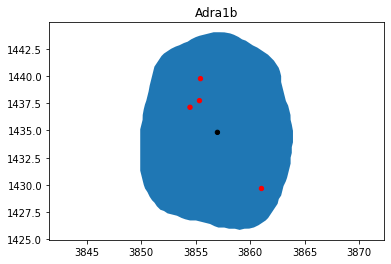

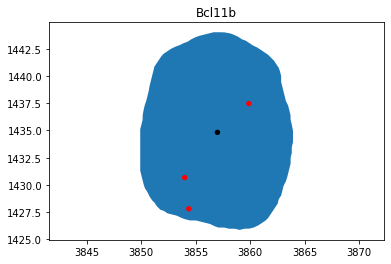

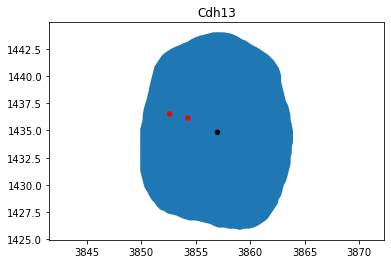

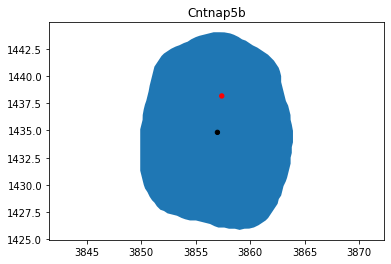

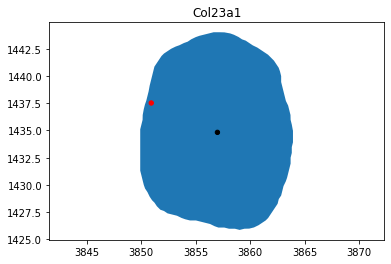

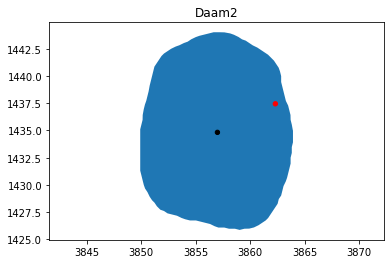

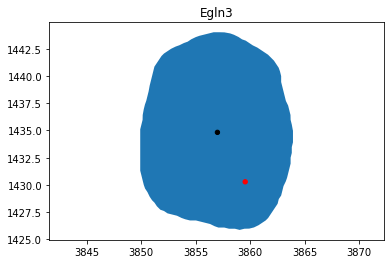

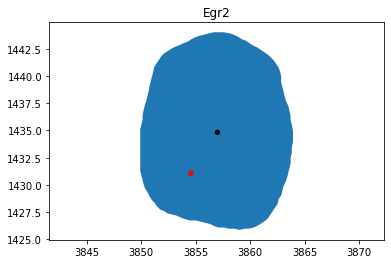

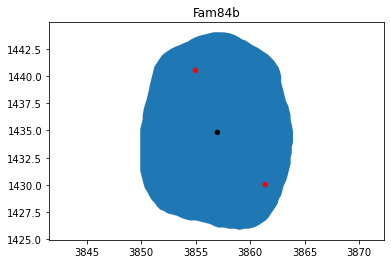

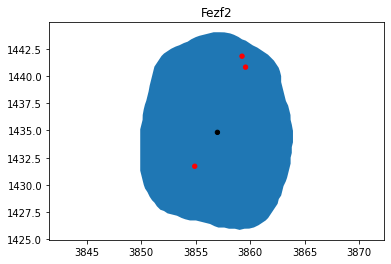

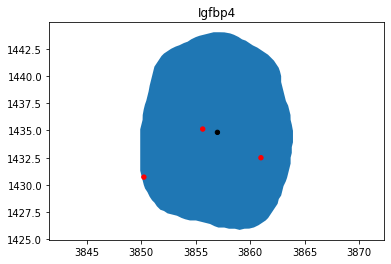

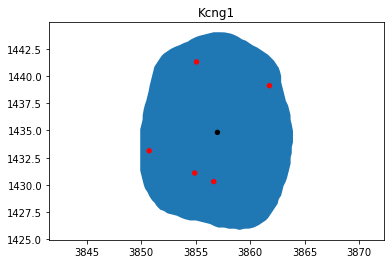

In [193]:
cell_id = '77349867718685954341331494478730186437'

cell = x[x['cell_id'].eq(cell_id)].copy()


cell['centroidX'] = cell['boundaryX'].str.split(', ').apply(lambda xs: sum(float(x) for x in xs)/len(xs))
cell['centroidY'] = cell['boundaryY'].str.split(', ').apply(lambda ys: sum(float(y) for y in ys)/len(ys))

cell['dist_from_centroid'] = np.sqrt(
    (cell['global_x']-cell['centroidX'])*(cell['global_x']-cell['centroidX']) +
    (cell['global_y']-cell['centroidY'])*(cell['global_y']-cell['centroidY'])
)

for gene,gene_g in cell.groupby('target_molecule_name'):
    fig,ax = plot_utils.plot_cells(gene_g)
    ax = plot_utils.add_spots(ax, gene_g)
    ax.add_artist(plt.Circle(
        (gene_g['centroidX'].values[0],gene_g['centroidY'].values[0]),
        0.2,
        color='black'
    ))
    plt.title(gene)
    plt.show()
    plt.close()

In [185]:
cell

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,boundaryX,boundaryY,slice_id,centroidX,centroidY
2,4002.2456,1505.9368,0.0,5730522E02Rik,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1,4006.986052,1513.14653
211,4006.5095,1514.0333,0.0,C1ql3,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1,4006.986052,1513.14653
213,4005.1475,1514.8705,0.0,C1ql3,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1,4006.986052,1513.14653
279,4008.2590,1514.7450,0.0,Cbln2,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1,4006.986052,1513.14653
280,4004.7278,1516.5895,0.0,Cbln2,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1,4006.986052,1513.14653
281,4010.5076,1517.1725,0.0,Cbln2,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1,4006.986052,1513.14653
282,4010.8662,1518.5425,0.0,Cbln2,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1,4006.986052,1513.14653
307,4012.7078,1515.9075,0.0,Cbln4,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1,4006.986052,1513.14653
308,4008.8800,1519.6528,0.0,Cbln4,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1,4006.986052,1513.14653
517,4006.7100,1515.4333,0.0,Cux2,1,185808754986678633834107256877173065969,"4013.773245344311, 4013.773245344311, 4013.664...","1513.9854706302285, 1513.442970648408, 1513.00...",mouse1_slice1,4006.986052,1513.14653


In [136]:
pd.merge(
    left = points,
    right = cells,
    on = 'cell_id',
    how = 'inner',
)

,global_x,global_y,global_z,target_molecule_name,cell_id,boundaryX,boundaryY,slice_id,x_points,y_points,boundary,path
0,4016.6018,1569.7213,0.0,Acta2,124640829214245959663055398760826058549,"4020.9342451043426, 4020.9342451043426, 4020.9...","1568.0184688195586, 1567.475968837738, 1566.93...",mouse1_slice1,"[4020.9342451043426, 4020.9342451043426, 4020....","[1568.0184688195586, 1567.475968837738, 1566.9...","[[4020.9342451043426, 1568.0184688195586], [40...","Path(array([[4020.9342451 , 1568.01846882],\n ..."
1,4017.7102,1556.3011,0.0,C1ql3,124640829214245959663055398760826058549,"4020.9342451043426, 4020.9342451043426, 4020.9...","1568.0184688195586, 1567.475968837738, 1566.93...",mouse1_slice1,"[4020.9342451043426, 4020.9342451043426, 4020....","[1568.0184688195586, 1567.475968837738, 1566.9...","[[4020.9342451043426, 1568.0184688195586], [40...","Path(array([[4020.9342451 , 1568.01846882],\n ..."
2,4011.8096,1579.0574,0.0,C1ql3,124640829214245959663055398760826058549,"4020.9342451043426, 4020.9342451043426, 4020.9...","1568.0184688195586, 1567.475968837738, 1566.93...",mouse1_slice1,"[4020.9342451043426, 4020.9342451043426, 4020....","[1568.0184688195586, 1567.475968837738, 1566.9...","[[4020.9342451043426, 1568.0184688195586], [40...","Path(array([[4020.9342451 , 1568.01846882],\n ..."
3,4008.9885,1568.1560,0.0,Camk2d,124640829214245959663055398760826058549,"4020.9342451043426, 4020.9342451043426, 4020.9...","1568.0184688195586, 1567.475968837738, 1566.93...",mouse1_slice1,"[4020.9342451043426, 4020.9342451043426, 4020....","[1568.0184688195586, 1567.475968837738, 1566.9...","[[4020.9342451043426, 1568.0184688195586], [40...","Path(array([[4020.9342451 , 1568.01846882],\n ..."
4,4009.4866,1568.0016,0.0,Cbln2,124640829214245959663055398760826058549,"4020.9342451043426, 4020.9342451043426, 4020.9...","1568.0184688195586, 1567.475968837738, 1566.93...",mouse1_slice1,"[4020.9342451043426, 4020.9342451043426, 4020....","[1568.0184688195586, 1567.475968837738, 1566.9...","[[4020.9342451043426, 1568.0184688195586], [40...","Path(array([[4020.9342451 , 1568.01846882],\n ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1590,3879.2407,1511.8065,9.0,Ptprk,13201049269943179451775338988356753505,"3881.4032497800886, 3881.4032497800886, 3881.2...","1514.2024706229568, 1513.6599706411362, 1513.2...",mouse1_slice1,"[3881.4032497800886, 3881.4032497800886, 3881....","[1514.2024706229568, 1513.6599706411362, 1513....","[[3881.4032497800886, 1514.2024706229568], [38...","Path(array([[3881.40324978, 1514.20247062],\n ..."
1591,3877.7136,1512.0752,9.0,Rgs5,13201049269943179451775338988356753505,"3881.4032497800886, 3881.4032497800886, 3881.2...","1514.2024706229568, 1513.6599706411362, 1513.2...",mouse1_slice1,"[3881.4032497800886, 3881.4032497800886, 3881....","[1514.2024706229568, 1513.6599706411362, 1513....","[[3881.4032497800886, 1514.2024706229568], [38...","Path(array([[3881.40324978, 1514.20247062],\n ..."
1592,3880.0770,1508.9353,9.0,Rorb,13201049269943179451775338988356753505,"3881.4032497800886, 3881.4032497800886, 3881.2...","1514.2024706229568, 1513.6599706411362, 1513.2...",mouse1_slice1,"[3881.4032497800886, 3881.4032497800886, 3881....","[1514.2024706229568, 1513.6599706411362, 1513....","[[3881.4032497800886, 1514.2024706229568], [38...","Path(array([[3881.40324978, 1514.20247062],\n ..."
1593,3879.4158,1509.3411,9.0,Slc17a6,13201049269943179451775338988356753505,"3881.4032497800886, 3881.4032497800886, 3881.2...","1514.2024706229568, 1513.6599706411362, 1513.2...",mouse1_slice1,"[3881.4032497800886, 3881.4032497800886, 3881....","[1514.2024706229568, 1513.6599706411362, 1513....","[[3881.4032497800886, 1514.2024706229568], [38...","Path(array([[3881.40324978, 1514.20247062],\n ..."


In [135]:
points.groupby('cell_id').size()

cell_id
117638286073100152981998827723053799635    302
124640829214245959663055398760826058549    634
130833304802439949434021516788979962052    607
13201049269943179451775338988356753505      52
dtype: int64

,global_x,global_y,global_z,target_molecule_name
76,3983.6418,1448.0171,0.0,Adra1b
479,3974.8110,1444.3433,0.0,Ctss
481,3976.2976,1449.2518,0.0,Ctss
603,3982.9924,1447.2104,0.0,Daam2
686,3975.6790,1445.3466,0.0,Fam19a2
...,...,...,...,...
42572,3978.8103,1447.0135,9.0,Ust
42685,3986.0286,1446.4265,9.0,Wipf3
42686,3980.3384,1446.4476,9.0,Wipf3
42687,3985.3354,1447.6666,9.0,Wipf3


In [81]:
cells.head()

,Unnamed: 0,boundaryX,boundaryY,slice_id,x_points,y_points
0,117638286073100152981998827723053799635,"3987.624746220559, 3987.5162462241947, 3987.50...","1448.7769728153944, 1448.342972829938, 1447.89...",mouse1_slice1,"[3987.624746220559, 3987.5162462241947, 3987.5...","[1448.7769728153944, 1448.342972829938, 1447.8..."
1,124640829214245959663055398760826058549,"4020.9342451043426, 4020.9342451043426, 4020.9...","1568.0184688195586, 1567.475968837738, 1566.93...",mouse1_slice1,"[4020.9342451043426, 4020.9342451043426, 4020....","[1568.0184688195586, 1567.475968837738, 1566.9..."
2,130833304802439949434021516788979962052,"3918.5102485366165, 3918.5102485366165, 3918.5...","1379.8794751241803, 1379.3369751423597, 1378.7...",mouse1_slice1,"[3918.5102485366165, 3918.5102485366165, 3918....","[1379.8794751241803, 1379.3369751423597, 1378...."
3,13201049269943179451775338988356753505,"3881.4032497800886, 3881.4032497800886, 3881.2...","1514.2024706229568, 1513.6599706411362, 1513.2...",mouse1_slice1,"[3881.4032497800886, 3881.4032497800886, 3881....","[1514.2024706229568, 1513.6599706411362, 1513...."
4,139909072544428399590516251121929997222,"4023.321245024353, 4023.321245024353, 4023.321...","1408.9574741497636, 1408.414974167943, 1407.87...",mouse1_slice1,"[4023.321245024353, 4023.321245024353, 4023.32...","[1408.9574741497636, 1408.414974167943, 1407.8..."


In [39]:
cells['slice_id'].unique()

array(['mouse1_slice1', 'mouse1_slice10', 'mouse1_slice21',
       'mouse1_slice31', 'mouse1_slice40', 'mouse1_slice50'], dtype=object)